In [1]:
''' low per strategy
buy : buy 30 low per stocks (undervalued stock) in aprill
sell : sell in agust 
per=market cap/Net Income=stock price/earnings per share(EPS)
'''
import pandas as pd

df_factor=pd.read_excel(
    #2021.04.02~08.31 kosdaq data
    "data/data_kosdaq_20210401_per.xlsx",
    index_col=0,
    usecols=[0,1,6,8] # ticker, name,PER,PBR 
)
df_factor=df_factor.rename_axis('Ticker')
df_factor=df_factor.rename(columns={'종목명':'Name'})
df_factor.head()

E:\anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Name,PER,PBR
Ticker,,,
060310,3S,-,3.38
054620,APS홀딩스,-,0.93
265520,AP시스템,42.92,3.86
211270,AP위성,300.98,2.8
035760,CJ ENM,26.55,1.05


In [2]:
df_factor.info()
#"object" is typically used to represent non-numeric data(string,date,categories)

<class 'pandas.core.frame.DataFrame'>
Index: 1475 entries, 060310 to 238490
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    1475 non-null   object
 1   PER     1475 non-null   object
 2   PBR     1475 non-null   object
dtypes: object(3)
memory usage: 46.1+ KB


In [3]:
import numpy as np
# data types are object because of '-'. so we need to erase '-'.
#inplace=True : make a changes in df_factor without 'df_factor='
df_factor.replace('-',np.nan,inplace=True)
df_factor.head()

,Name,PER,PBR
Ticker,,,
060310,3S,NaN,3.38
054620,APS홀딩스,NaN,0.93
265520,AP시스템,42.92,3.86
211270,AP위성,300.98,2.80
035760,CJ ENM,26.55,1.05


In [4]:
#we also need the trading volume. so read anader excel file
import pandas as pd

df_volume=pd.read_excel("data/data_kosdaq_20210401_sise.xlsx",index_col=0,
                        usecols=[0,9])# ticker, volume
df_volume=df_volume.rename_axis('Ticker')
df_volume.columns=['Volume']
df_volume.head()

E:\anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Volume
Ticker,
060310,287995
054620,369245
265520,118094
211270,313536
035760,76549


In [5]:
#combine two dataframes
df2=df_factor.join(df_volume)
df2.head()

,Name,PER,PBR,Volume
Ticker,,,,
060310,3S,NaN,3.38,287995
054620,APS홀딩스,NaN,0.93,369245
265520,AP시스템,42.92,3.86,118094
211270,AP위성,300.98,2.80,313536
035760,CJ ENM,26.55,1.05,76549


In [6]:
print(df2.shape)

(1475, 4)


In [7]:
#we also need the fluctuation rate
import pandas as pd
#2021.04.02
df_change=pd.read_excel("data/data_kosdaq_change_2021.xlsx",index_col=0,
                        usecols=[0,5]) # ticker, Fluctuation rate
df_change=df_change.rename_axis('Ticker')
df_change.columns=['Fluctuation rate']
df_change.head()

E:\anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Fluctuation rate
Ticker,
060310,36.98
054620,100.51
265520,0.35
211270,2.93
013720,20.31


In [8]:
df3=df2.join(df_change)
df3.head()

,Name,PER,PBR,Volume,Fluctuation rate
Ticker,,,,,
060310,3S,NaN,3.38,287995,36.98
054620,APS홀딩스,NaN,0.93,369245,100.51
265520,AP시스템,42.92,3.86,118094,0.35
211270,AP위성,300.98,2.80,313536,2.93
035760,CJ ENM,26.55,1.05,76549,8.58


In [9]:
#remove 'volume=0' stocks
cond=df3['Volume']!=0
df4=df3[cond].copy()

In [10]:
# sort ascending
df5= df4.sort_values(by="PER",ascending=True)
df5.reset_index(inplace=True)
df5

,Ticker,Name,PER,PBR,Volume,Fluctuation rate
0,030960,양지사,1.34,0.99,50285,7.23
1,032940,원익,2.11,0.86,79905,-8.56
2,007720,대명소노시즌,2.28,0.88,728675,-9.34
3,151860,KG ETS,2.28,0.94,701304,181.89
4,005670,푸드웰,2.39,0.98,104191,15.89
...,...,...,...,...,...,...
1380,064240,홈캐스트,NaN,1.53,112157,6.79
1381,050090,휘닉스소재,NaN,3.48,9550009,-20.73
1382,090710,휴림로봇,NaN,3.05,2215108,-7.87
1383,205470,휴마시스,NaN,13.25,2360495,121.76


In [11]:
low_per30=df5.iloc[:30]
low_per30['Fluctuation rate'].mean()

14.45

In [12]:
# divide 30 stocks into 20 groups based on their PER level.
import pandas as pd

df5['Group']=pd.cut(df5.index, bins=20, labels=False)
df6=df5.groupby(by='Group')[['Fluctuation rate']].mean()
df6

,Fluctuation rate
Group,
0,12.979143
1,11.553971
2,15.552647
3,17.360145
4,10.876143
5,7.814783
6,8.540000
7,7.813623
8,5.913768


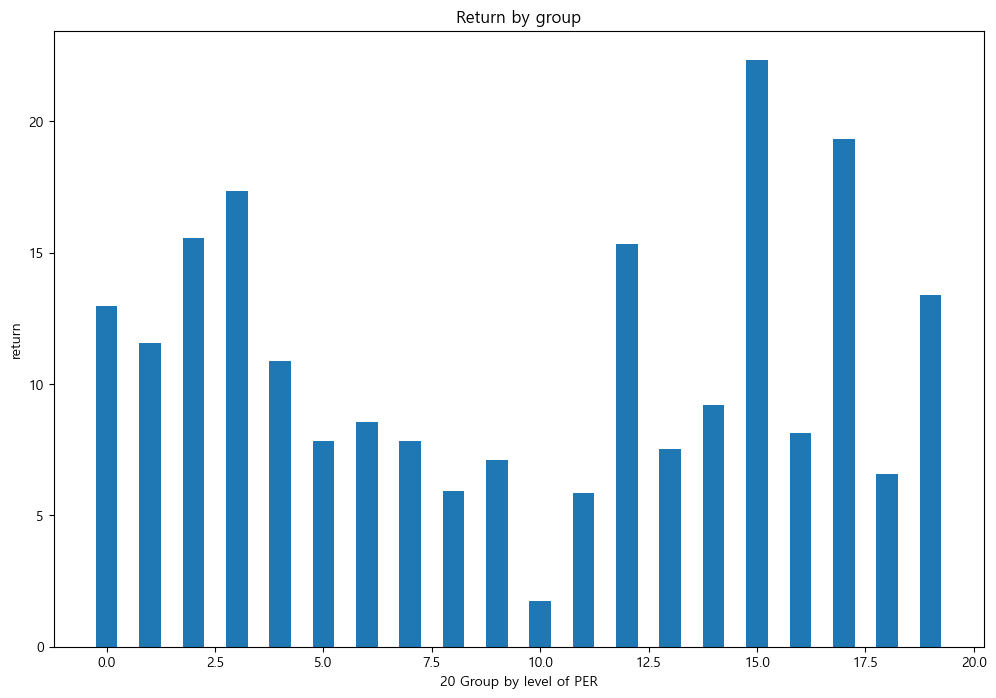

In [13]:
import matplotlib.pyplot as plt
import platform

# when os is mac, the font is 'Darwin'
if platform.system()=='Darwin':
    plt.rc('font',family='AppleGothic')
# when os is win, the font is 'Malgun Gothic'
else:
    plt.rc('font',family='Malgun Gothic')
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(1,1,1)

ax.bar(df6.index,df6["Fluctuation rate"],width=0.5)
plt.title("Return by group")
plt.xlabel("20 Group by level of PER")
plt.ylabel("return")
plt.show()

In [14]:
#out put : low per stock and high per stock were good.

In [15]:
'''PBR+PER strategy
buy : 30 low PBR stocks in PER 2.5~10 stocks
PBR=market cap/capital 
'''
cond=(df4['PER']>=2.5)&(df4['PER']<=10)
print(cond)
df5=df4[cond].copy()
print(df5)

Ticker
060310    False
054620    False
265520    False
211270    False
035760    False
          ...  
024060    False
010240    False
189980    False
037440    False
238490    False
Name: PER, Length: 1385, dtype: bool
           Name   PER   PBR   Volume  Fluctuation rate
Ticker                                                
023460     CNH   6.58  0.99   138189             35.30
028150   GS홈쇼핑   8.28  0.87     7971               NaN
021320   KCC건설   6.96  0.52    51828             26.36
036670     KCI   8.99  1.65    17555             -3.35
024940    PN풍년   9.10  1.37   528639             29.52
...         ...   ...   ...      ...               ...
054040   한국컴퓨터   9.46  0.80  4380527             -3.62
054920    한컴위드   4.72  2.04   673200              4.12
039010    현대통신   9.09  1.19   103289            -16.09
115160     휴맥스   5.61  0.29   222087             21.93
028080  휴맥스홀딩스   7.19  0.32    27664             99.22

[104 rows x 5 columns]


In [16]:
df6=df5.sort_values(by='PBR')[:30]
'''.describe : providing information such as count, mean, standard deviation, 
minimum, maximum, and quartiles for each column in the DataFrame.'''
df6.describe()

,PER,PBR,Volume,Fluctuation rate
count,30.000000,30.000000,3.000000e+01,30.000000
mean,6.250000,0.558667,4.345707e+06,13.265667
std,1.925885,0.130377,1.984129e+07,26.490045
min,2.890000,0.280000,7.130000e+03,-38.190000
25%,5.082500,0.485000,3.468775e+04,-2.790000
50%,6.100000,0.580000,7.865950e+04,11.555000
75%,7.977500,0.670000,2.856495e+05,26.232500
max,9.100000,0.730000,1.083873e+08,99.220000


In [17]:
#out put : return 13.26% (5month data 2021.04.02~08.31 of kosdaq)

In [18]:
#5 month -> 10 years
from pykrx import stock
import pandas as pd
year=2010
date=102
while True:
    df1=stock.get_market_cap(f"{year}0{date}")
    if df1.iloc[0,0]==0:
        date+=1
    else:
        break
    print(f"{year}0{date}")
print(df1)
df1=df1[["종가","시가총액"]]
df1.columns=["Opening price","Market cap"]
df1=df1.sort_values('Market cap')
'''
df1.reset_index().index resets the index of df1 and 
retrieves the resulting index values. This is done to ensure 
that the index values are continuous and start from zero.

pd.cut(x, bins, labels=None, right=True, include_lowest=False)

x: This is the input data, which can be a Series or array-like object.

bins: This specifies the intervals or cutoff points for binning. 
It can be an integer, specifying the number of equal-width bins 
to create, or a sequence of scalar values, specifying the bin edges.

labels (optional): This parameter is used to assign labels 
to the resulting bins. If not specified, 
the resulting bins will be integer-based.

right (optional): A boolean value indicating 
whether the intervals should be closed on the right (default) or left.

include_lowest (optional): A boolean value indicating 
whether to include the leftmost edge of the bins.'''
df1['Group']=pd.cut(df1.reset_index().index,bins=3,labels=['small cap','mid cap','large cap'])
df1=df1.rename_axis('Ticker')
df1.head()

20100103
20100104
             종가             시가총액      거래량          거래대금      상장주식수
티커                                                                
005930   809000  119165163633000   239271  192566991282  147299337
005490   612000   53358343020000   133963   81892175000   87186835
005380   119000   26212901001000  1606672  190847186500  220276479
105560    59400   22949290564200  1201665   71147524000  386351693
015760    34250   21973694136000  1924201   65724306900  641567712
...         ...              ...      ...           ...        ...
017555   174500        177990000        6       1075500       1020
033855    12850        145873200        0             0      11352
009815   641000        110893000        0             0        173
020075     3750         75000000      257        865850      20000
001385  5466000         60126000        0             0         11

[1961 rows x 5 columns]


,Opening price,Market cap,Group
Ticker,,,
001385,5466000,60126000,small cap
020075,3750,75000000,small cap
009815,641000,110893000,small cap
033855,12850,145873200,small cap
017555,174500,177990000,small cap


In [19]:
df2=stock.get_market_fundamental("20100104")
df2=df2[['PER','PBR']]
df2=df2.rename_axis('Ticker')
df2.head()

,PER,PBR
Ticker,,
004560,0.00,0.76
004565,0.00,0.00
001460,16.15,0.43
001465,0.00,0.00
084680,0.00,1.69


In [20]:
df3=stock.get_market_ohlcv("20101230")
print(df3)
df3=df3[['종가']]
df3.columns=["Closing price"]
df3=df3.rename_axis('Ticker')
df3.head()

            시가      고가      저가      종가     거래량         거래대금   등락률
티커                                                               
004560   11100   11350   11000   11250   62628    700701500  1.81
004565   12250   12500   12100   12450     620      7638000  1.63
001460  163000  163000  161000  161000      62     10092500 -1.23
001465   74400   74400   74400   74400       2       148800  0.00
001040   79000   80600   78700   78900  198171  15731238700 -0.50
...        ...     ...     ...     ...     ...          ...   ...
069260   20100   20200   19600   19600  338324   6682131600 -2.49
000540    5800    6150    5800    6100  311020   1886343800  3.92
000547    5840    6000    5800    6000    1300      7718000  3.45
000545    2720    2800    2660    2770   14811     40422545  2.40
003280    1170    1195    1140    1160  838885    972417350 -1.69

[927 rows x 7 columns]


,Closing price
Ticker,
004560,11250
004565,12450
001460,161000
001465,74400
001040,78900


In [21]:
'''left_index=True : In pandas, when you want to merge DataFrames using 
their indices rather than columns, you can use the .merge method 
with the left_index=True and right_index=True parameters. 
This is often referred to as "index-based merging."'''
t0=pd.merge(left=df1,right=df2, left_index=True, right_index=True)
df=pd.merge(left=df3,right=t0,left_index=True,right_index=True)
df.columns=['Closing price','Opening price','Market cap','Group','PER','PBR']
df.head()

,Closing price,Opening price,Market cap,Group,PER,PBR
Ticker,,,,,,
004560,11250,8910,134352206010,large cap,0.00,0.76
004565,12450,8370,919461240,small cap,0.00,0.00
001460,161000,125000,78076875000,mid cap,16.15,0.43
001465,74400,55400,11932329000,small cap,0.00,0.00
001040,78900,62200,1767577581200,large cap,5.46,0.78


In [22]:
df=df.query('PBR!=0')
df['Return']=df['Closing price']/df['Opening price']
cond=(df['PER']>=2.5)&(df['PER']<=10)
# Select 30 stocks per group(small, mid, large) with the lowest pbr
# total 90 stocks [small(30), mid(30), large(30)]
top30=df[cond].sort_values('PBR').groupby('Group').head(30)
top30

,Closing price,Opening price,Market cap,Group,PER,PBR,Return
Ticker,,,,,,,
015110,2690,5140,33871299580,mid cap,3.04,0.16,0.523346
013700,5800,6950,31380834600,mid cap,8.40,0.17,0.834532
014350,4000,4600,27600000000,small cap,4.68,0.17,0.869565
004270,8200,8800,31866700800,mid cap,6.90,0.18,0.931818
008600,2950,2810,35207130680,mid cap,6.40,0.20,1.049822
...,...,...,...,...,...,...,...
014910,2570,1530,20841294330,small cap,6.27,0.75,1.679739
023810,4740,2350,23500000000,small cap,5.86,0.82,2.017021
014130,22400,14000,16800000000,small cap,5.71,1.13,1.600000


In [23]:
import numpy as np

how={'Return':np.mean}
#Aggregate by group
yoy=top30.groupby('Group').agg(how)
yoy.columns=['2010']
print(yoy)

               2010
Group              
small cap  1.291967
mid cap    1.115437
large cap  1.004330


In [24]:
#out put : small cap 29% mid cap 11% large cap 0.4%

In [25]:
def low_per_pbr(year):
    date=102
    date2=1231

    while True:
        df1=stock.get_market_cap(f"{year}0{date}")
        if df1.iloc[0,0]==0:
            date+=1
        else:
            break
    df1=df1[["종가","시가총액"]]
    df1.columns=["Opening price","Market cap"]
    df1=df1.sort_values('Market cap')
    df1['Group']=pd.cut(df1.reset_index().index,bins=3,labels=['Small cap', 'mid cap', 'large cap'])
    
    df2=stock.get_market_fundamental(f"{year}0{date}")
    df2=df2[['PER','PBR']]
    
    while True:
        df3=stock.get_market_cap(f"{year}{date2}")
        if df3.iloc[0,0]==0:
            date2-=1
        else:
            break
    df3=stock.get_market_ohlcv(f"{year}{date2}")
    df3=df3[['종가']]
    df3.columns=['Closing price']
    
    t0=pd.merge(left=df1, right=df2,left_index=True,right_index=True)
    df=pd.merge(left=df3, right=t0,left_index=True,right_index=True)
    
    df=df.query('PBR!=0').copy()
    df['Return']=df['Closing price']/df['Opening price']
    cond=(df['PER']>=2.5)&(df['PER']<=10)
    top30=df[cond].sort_values('PBR').groupby('Group').head(30)
    
    how={
        'Return': np.mean
    }
    yoy=top30.groupby('Group').agg(how)
    yoy.columns=[year]
    return yoy

In [26]:
import time

dfs=[]
for year in range(2010,2023):
    df=low_per_pbr(f"{year}")
    dfs.append(df)
    time.sleep(1)
    
df=pd.concat(dfs,axis=1)
print(df)

               2010      2011      2012      2013      2014      2015  \
Group                                                                   
Small cap  1.291967  1.137539  1.900887  1.076109  1.188823  1.737062   
mid cap    1.115437  0.830549  1.229470  1.222966  1.362025  1.138875   
large cap  1.004330  0.801437  1.129181  1.139252  1.135369  1.101412   

               2016      2017      2018      2019      2020      2021  \
Group                                                                   
Small cap  1.504717  1.053752  1.169047  1.156565  1.575962  1.298138   
mid cap    1.207054  1.058839  0.904031  1.033259  1.160604  1.597770   
large cap  1.135898  1.114645  0.816637  0.939090  1.051738  1.313029   

               2022  
Group                
Small cap  1.034125  
mid cap    0.903299  
large cap  0.950984  


In [27]:
#the cumulative product is calculated along the rows of the DataFrame.
df=df.cumprod(axis=1)
df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Group,,,,,,,,,,,,,
Small cap,1.291967,1.469663,2.793665,3.006287,3.573942,6.208158,9.341524,9.843653,11.507689,13.309393,20.975095,27.228569,28.157753
mid cap,1.115437,0.926425,1.139012,1.392973,1.897264,2.160746,2.608138,2.761598,2.496571,2.579605,2.993898,4.783562,4.320987
large cap,1.004330,0.804907,0.908886,1.035450,1.175618,1.294841,1.470806,1.639427,1.338816,1.257269,1.322318,1.736242,1.651138


<Axes: >

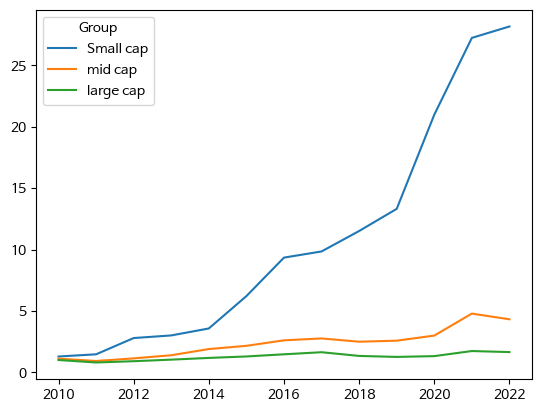

In [28]:
#transpose() : transpose the rows and columns of a DataFrame.
df.transpose().plot.line()

In [29]:
df.loc['Small cap','2022']

28.157753273277564

In [30]:
CAGR=df.loc['Small cap','2022']**(1/12)-1
print(CAGR*100)

32.068678810969665


In [31]:
'''conclusion : PBR+PER Strategy in small caps 
Total return for 2010~2022 : 2815% [per year(CAGR) 29.27%] 

PBR+PER St(32.06)>VB st(10.29)>Halloween St(6.81)>buy and hold(6.36)
'''

'conclusion : PBR+PER Strategy in small caps \nTotal return for 2010~2022 : 2815% [per year(CAGR) 29.27%] \n\nPBR+PER St(32.06)>VB st(10.29)>Halloween St(6.81)>buy and hold(6.36)\n'